# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [4]:
# !pip install numpy pandas matplotlib

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import time
Start_time = time.time()

In [7]:
ratings = np.array([[3,2],
                    [2,4],
                    [4,1]])
df = pd.DataFrame(data=ratings, columns=['Drama', 'Scifi'], index=['Navaneeth', 'Sai', 'Harshitha'])
df

,Drama,Scifi
Navaneeth,3,2
Sai,2,4
Harshitha,4,1


Text(0, 0.5, 'Scifi')

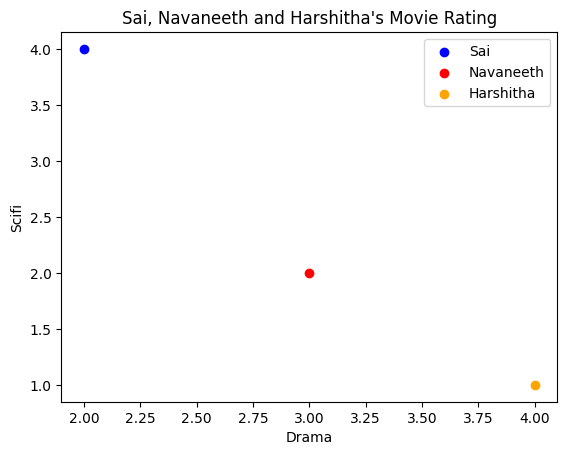

In [8]:
plt.scatter(df.loc['Sai', 'Drama'], df.loc['Sai', 'Scifi'], color='Blue', label='Sai')
plt.scatter(df.loc['Navaneeth', 'Drama'], df.loc['Navaneeth', 'Scifi'], color='Red', label='Navaneeth')
plt.scatter(df.loc['Harshitha', 'Drama'], df.loc['Harshitha', 'Scifi'], color='Orange', label='Harshitha')
plt.legend()
plt.title("Sai, Navaneeth and Harshitha's Movie Rating")
plt.xlabel('Drama')
plt.ylabel('Scifi')



# Euclidean distance

In [9]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1, vector2) ** 2))

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

from scipy.spatial.distance import euclidean

In [10]:
# Calculate the Euclidian distance between Navaneeth and Sai and Sai and Harshitha more dimentional data

print("Distance between Navaneeth and Sai:", euclidean(df.loc['Navaneeth'], df.loc['Sai']))
print("Distance bewteen Sai and Harshitha:", euclidean(df.loc['Sai'], df.loc['Harshitha']))

Distance between Navaneeth and Sai: 2.23606797749979
Distance bewteen Sai and Harshitha: 3.605551275463989


# Cosine distance or similarity

In [11]:
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / np.sqrt(np.dot(vector1,vector1) * np.sqrt(np.dot(vector2, vector2)))

from scipy.spatial.distance import cosine

In [12]:

# Calculate the cosine simularity distance between Sai and Navaneeth and Navaneeth and Harshitha with more dimentional data

print("Cosine between Sai and Navaneeth:", cosine(df.loc['Sai'], df.loc['Navaneeth']), "\n",
    "Cosine between Navaneeth and Harshitha:", cosine(df.loc['Navaneeth'], df.loc['Harshitha']))

Cosine between Sai and Navaneeth: 0.1317568578755407 
 Cosine between Navaneeth and Harshitha: 0.058258088405162556


In [13]:
ratings = np.array([[3, 2, 5, 4, 1],
                    [2, 4, 1, 5, 3],
                    [4, 1, 2, 3, 5]])
df = pd.DataFrame(ratings, columns = ['Drama', 'Scifi', 'Romance', 'Comedy', 'Action'], index = ['Navaneeth', 'Sai', 'Harshitha'])
df

,Drama,Scifi,Romance,Comedy,Action
Navaneeth,3,2,5,4,1
Sai,2,4,1,5,3
Harshitha,4,1,2,3,5


In [14]:
# Calculate the Euclidian distance between Navaneeth and Sai and Sai and Harshitha with more dimentional data
print("Distance between Amy and Clark:", euclidean(df.loc['Navaneeth'], df.loc['Sai']))
print("Distance bewteen Bill to Clark:", euclidean(df.loc['Navaneeth'], df.loc['Harshitha']))

Distance between Amy and Clark: 5.0990195135927845
Distance bewteen Bill to Clark: 5.291502622129181


In [15]:
# Calculate the cosine simularity distance between Navaneeth and Sai and Sai and Harshitha with more dimentional data
print("Cosine between Amy and Clark:", cosine(df.loc['Navaneeth'], df.loc['Sai']))
print("Cosine between Bill and Clark:", cosine(df.loc['Sai'], df.loc['Harshitha']))

Cosine between Amy and Clark: 0.23636363636363633
Cosine between Bill and Clark: 0.19999999999999996


# Pearson correlation

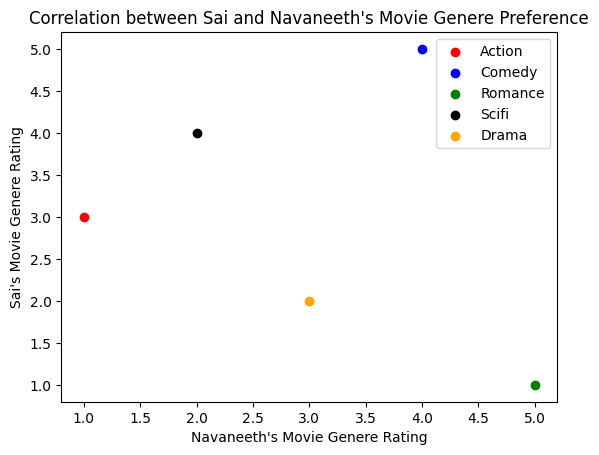

In [16]:
# Plot Navaneeth's genere rating vs Sai's genere rating 
plt.scatter(df.loc['Navaneeth','Action'], df.loc['Sai','Action'], color='Red', label='Action')
plt.scatter(df.loc['Navaneeth','Comedy'], df.loc['Sai','Comedy'], color='Blue', label='Comedy')
plt.scatter(df.loc['Navaneeth','Romance'], df.loc['Sai','Romance'], color='Green', label='Romance')
plt.scatter(df.loc['Navaneeth','Scifi'], df.loc['Sai','Scifi'], color='Black', label='Scifi')
plt.scatter(df.loc['Navaneeth','Drama'], df.loc['Sai','Drama'], color='Orange', label='Drama')
plt.legend()
plt.title("Correlation between Sai and Navaneeth's Movie Genere Preference")
plt.xlabel("Navaneeth's Movie Genere Rating")
plt.ylabel("Sai's Movie Genere Rating")
plt.show()

In [17]:
#import the pearson function
from scipy.stats import pearsonr

In [18]:
# Calulate the Pearson coefficent between each user and Navaneeth

print("Pearson's Coefficient between Sai and Navaneeth:", pearsonr(df.loc['Sai'], df.loc['Navaneeth'])[0], "\n",
      "Pearson's Coefficient between Navaneeth and Harshitha:", pearsonr(df.loc['Harshitha'], df.loc['Navaneeth'])[0])

Pearson's Coefficient between Sai and Navaneeth: -0.30000000000000004 
 Pearson's Coefficient between Navaneeth and Harshitha: -0.4000000000000001


## Creating a top-item recommender

In [19]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

In [20]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
pd.to_datetime(ratings['timestamp'], unit='ms')

0        1970-01-12 04:03:02.703
1        1970-01-12 04:03:01.247
2        1970-01-12 04:03:02.224
3        1970-01-12 04:03:03.815
4        1970-01-12 04:03:02.931
                   ...          
100831   1970-01-18 06:57:28.402
100832   1970-01-18 06:57:30.091
100833   1970-01-18 07:04:33.047
100834   1970-01-18 06:57:26.352
100835   1970-01-18 06:57:26.415
Name: timestamp, Length: 100836, dtype: datetime64[ns]

In [23]:
ratings.groupby('movieId').sum()

,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


In [24]:
ratings.groupby('movieId').sum().sort_values(by='rating', ascending=True)

,userId,rating,timestamp
movieId,,,
141994,514,0.5,1536381303
95796,382,0.5,1515163188
122888,567,0.5,1525289924
72696,382,0.5,1515163384
97024,10,0.5,1455301892
...,...,...,...
593,85535,1161.0,320035674330
2571,85236,1165.5,350270041779
296,90621,1288.5,349204311001


In [25]:
movies.set_index('movieId', inplace=True)

In [26]:
idx = ratings.groupby('movieId')['rating'].sum().sort_values(ascending=False)
idx

movieId
318       1404.0
356       1370.0
296       1288.5
2571      1165.5
593       1161.0
           ...  
160872       0.5
8236         0.5
57326        0.5
82684        0.5
138798       0.5
Name: rating, Length: 9724, dtype: float64

In [27]:
new_df = pd.concat([movies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)
new_df

,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN


## Creating a simple collaborative filtering recommender

In [28]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
wide.fillna(-1, inplace=True)

In [30]:
cor = wide.T.corr()

In [31]:
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.018916,0.059204,0.179894,0.121369,0.103828,0.141187,0.130393,0.052089,0.003243,...,0.064748,0.148329,0.191966,0.058442,0.135612,0.122529,0.259260,0.268676,0.086328,0.094546
2,0.018916,1.000000,-0.002936,-0.001895,0.015369,0.015436,0.025824,0.024174,-0.003570,0.065066,...,0.199690,0.010897,-0.004286,-0.005430,-0.008081,0.011038,0.006055,0.031115,0.025154,0.087520
3,0.059204,-0.002936,1.000000,-0.002646,0.007895,0.000028,-0.006534,0.007555,-0.003594,-0.006335,...,0.006577,0.005261,0.015396,-0.005467,0.003285,0.002749,0.019761,0.015210,-0.003342,0.014557
4,0.179894,-0.001895,-0.002646,1.000000,0.122238,0.069313,0.102479,0.060439,0.002010,0.018884,...,0.077143,0.116174,0.286354,0.041942,0.062982,0.165208,0.118940,0.124587,0.024487,0.060899
5,0.121369,0.015369,0.007895,0.122238,1.000000,0.298352,0.103712,0.429288,-0.004360,0.025950,...,0.060624,0.415991,0.098957,0.262230,0.141565,0.089978,0.149544,0.129392,0.256483,0.040026


In [32]:
cor.iloc[1].sort_values(ascending=False)

userId
2      1.000000
366    0.300528
378    0.277953
417    0.277085
550    0.252587
         ...   
234   -0.007649
605   -0.008081
312   -0.008135
104   -0.009044
217   -0.013622
Name: 2, Length: 610, dtype: float64

In [33]:
wide.iloc[1].notna().equals(wide.iloc[300].notna())

True

In [34]:
new_df = new_df.reset_index()
new_df

,movieId,title,genres,userId,rating,timestamp
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
3,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
4,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...,...
9737,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
9738,32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
9739,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN
9740,34482,"Browning Version, The (1951)",Drama,NaN,NaN,NaN


In [35]:
user1 = 1
user2 = 300

user2_ratings = new_df[(new_df['userId'] == 2) & (new_df['rating'].notna())]
user1_rated_movies = new_df[(new_df['userId'] == 1) & (new_df['rating'].notna())]['movieId']
movies_for_user2 = user2_ratings[user2_ratings['movieId'].isin(user1_rated_movies)]

print(movies_for_user2)

Empty DataFrame
Columns: [movieId, title, genres, userId, rating, timestamp]
Index: []


In [36]:
wide.fillna(-1, inplace=True)

In [37]:
euclidean(wide.iloc[1], wide.iloc[300])

53.464941784313204

In [38]:
from scipy.spatial.distance import pdist, squareform

In [39]:
euclidean_distances = squareform(pdist(wide, metric=euclidean)) 

In [40]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [41]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [42]:
euclidean_df.loc[1].sort_values()

userId
1        0.000000
493     80.851716
39      81.357237
494     81.767964
164     81.841310
          ...    
448    171.276823
610    179.904836
599    181.565415
474    203.798921
414    224.808252
Name: 1, Length: 610, dtype: float64

In [43]:
euclidean_df.loc[1].sort_values().loc[136]

90.43229511629127

In [44]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[1].sort_values()

userId
1      0.000000
39     0.256315
493    0.257912
96     0.262586
164    0.265731
         ...   
448    0.741735
610    0.774839
599    0.810149
474    0.862710
414    0.917347
Name: 1, Length: 610, dtype: float64

In [45]:
cosine_df.loc[1].sort_values().loc[96]

0.2625863342549468

## More EDA

In [46]:
print(wide.loc[1].max())
print(wide.loc[1].argmax())

5.0
43


In [47]:
wide.columns[5]

6

In [48]:
movies.loc[6]

title               Heat (1995)
genres    Action|Crime|Thriller
Name: 6, dtype: object

In [49]:
ratings[(ratings['movieId'] == 6) & (ratings['rating'] == 5.0)]

,userId,movieId,rating,timestamp
1259,11,6,5.0,902154266
14124,91,6,5.0,1112712032
18775,121,6,5.0,847656264
21085,140,6,5.0,942843185
29380,202,6,5.0,974918622
35302,239,6,5.0,1221158564
35855,244,6,5.0,975092819
39034,269,6,5.0,850865480
44463,297,6,5.0,900871748
48795,317,6,5.0,1430532917


In [50]:
wide.loc[1][wide.loc[1] == 5]

movieId
47      5.0
50      5.0
101     5.0
151     5.0
157     5.0
       ... 
3702    5.0
3703    5.0
3729    5.0
3793    5.0
5060    5.0
Name: 1, Length: 124, dtype: float64

In [51]:
wide.loc[1].sort_values(ascending=False)

movieId
2991      5.0
1220      5.0
1282      5.0
2291      5.0
2899      5.0
         ... 
4624     -1.0
4625     -1.0
4626     -1.0
4628     -1.0
193609   -1.0
Name: 1, Length: 9724, dtype: float64

# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.



1. Exploratory Data Analysis (EDA): 
- First I Checked how many movies a specific user has watched.   
- Then Plotted a bar chart of movie ratings.

2. Similarity Calculations: 
- I Used Euclidean distance, Cosine similarity, and Pearson correlation to measure user similarities.

3. Recommendation System:  
- Built a Top-Item Recommender by ranking movies based on ratings.  
- Created a Collaborative Filtering Recommender by analyzing user-item rating similarities.

4. Additional Insights:
- I Explored patterns in user ratings.  
- Used distance metrics to compare users and find similar movie preferences.

5. Conclusion: 
- Summarized findings based on the analysis and recommendation results.

